In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_train = pd.read_parquet("C:/Users/PROFFESSOR/Desktop/DATA_TALKS/assignment1/fhv_tripdata_2021-01.parquet")
df_val = pd.read_parquet("C:/Users/PROFFESSOR/Desktop/DATA_TALKS/assignment1/fhv_tripdata_2021-02.parquet")

In [3]:
df_train.shape, df_val.shape

((1154112, 7), (1037692, 7))

## QN1. How many data records are there in January

### 1154112

In [4]:
df_train.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037


In [5]:
df_val.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00013,2021-02-01 00:01:00,2021-02-01 01:33:00,NaN,NaN,None,B00014
1,B00021,2021-02-01 00:55:40,2021-02-01 01:06:20,173.0,82.0,None,B00021
2,B00021,2021-02-01 00:14:03,2021-02-01 00:28:37,173.0,56.0,None,B00021
3,B00021,2021-02-01 00:27:48,2021-02-01 00:35:45,82.0,129.0,None,B00021
4,B00037,2021-02-01 00:12:50,2021-02-01 00:26:38,NaN,225.0,None,B00037


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1154112 entries, 0 to 1154111
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   dispatching_base_num    1154112 non-null  object        
 1   pickup_datetime         1154112 non-null  datetime64[ns]
 2   dropOff_datetime        1154112 non-null  datetime64[ns]
 3   PUlocationID            195845 non-null   float64       
 4   DOlocationID            991892 non-null   float64       
 5   SR_Flag                 0 non-null        object        
 6   Affiliated_base_number  1153227 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(3)
memory usage: 61.6+ MB


In [7]:
df_train['duration'] = df_train.dropOff_datetime - df_train.pickup_datetime
df_val['duration'] = df_val.dropOff_datetime - df_val.pickup_datetime

In [8]:
df_train.duration = df_train.duration.apply(lambda td: td.total_seconds() / 60)
df_val.duration = df_val.duration.apply(lambda td: td.total_seconds() / 60)
df_train.duration.mean()

19.1672240937939

## QN.2 What is the average trip duration in minutes in January
### 19.16

In [9]:
#checking the distribution of duration
df_train.duration.describe()

count    1.154112e+06
mean     1.916722e+01
std      3.986922e+02
min      1.666667e-02
25%      7.766667e+00
50%      1.340000e+01
75%      2.228333e+01
max      4.233710e+05
Name: duration, dtype: float64

Text(0.5, 1.0, 'Plot of distribution of duration variable')

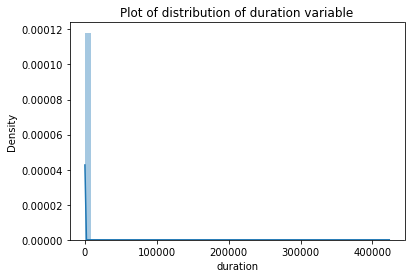

In [10]:
sns.distplot(df_train.duration)
plt.title("Plot of distribution of duration variable")

In [11]:
df_new=df_train[(df_train.duration >= 1) & (df_train.duration <= 60)]
df_val=df_val[(df_val.duration >= 1) & (df_val.duration <= 60)]

In [12]:
print("Number of records dropped are {}".format((len(df_train) - len(df_new))))

Number of records dropped are 44286


In [13]:
#remaining records after dropping some values 
print(len(df_new))

1109826


In [14]:
#This is a function definition to show the state of the data at any given point
def show_data_state(data):
    df = pd.DataFrame(index=["unique values", "dtype", "null values", "null%"])
    print()
    for col in data.columns:
        df[col] = [data[col].nunique(), data[col].dtype, data[col].isnull().sum(), f"{(data[col].isnull().sum()/data[col].shape[0]) * 100:.2f}"]
    return(df.T)

In [15]:
show_data_state(df_new)

,unique values,dtype,null values,null%
dispatching_base_num,533,object,0,0.00
pickup_datetime,785436,datetime64[ns],0,0.00
dropOff_datetime,790848,datetime64[ns],0,0.00
PUlocationID,261,float64,927008,83.53
DOlocationID,262,float64,147907,13.33
SR_Flag,0,object,1109826,100.00
Affiliated_base_number,698,object,773,0.07
duration,3541,float64,0,0.00


In [16]:
show_data_state(df_val)

,unique values,dtype,null values,null%
dispatching_base_num,489,object,0,0.00
pickup_datetime,699320,datetime64[ns],0,0.00
dropOff_datetime,705820,datetime64[ns],0,0.00
PUlocationID,261,float64,848661,85.71
DOlocationID,263,float64,134760,13.61
SR_Flag,0,object,990113,100.00
Affiliated_base_number,659,object,0,0.00
duration,3541,float64,0,0.00


In [17]:
df_new['PUlocationID']= df_new['PUlocationID'].fillna(-1)
df_new['DOlocationID']= df_new['DOlocationID'].fillna(-1)
df_val['PUlocationID']= df_val['PUlocationID'].fillna(-1)
df_val['DOlocationID']= df_val['DOlocationID'].fillna(-1)

In [18]:
show_data_state(df_val)

,unique values,dtype,null values,null%
dispatching_base_num,489,object,0,0.00
pickup_datetime,699320,datetime64[ns],0,0.00
dropOff_datetime,705820,datetime64[ns],0,0.00
PUlocationID,262,float64,0,0.00
DOlocationID,264,float64,0,0.00
SR_Flag,0,object,990113,100.00
Affiliated_base_number,659,object,0,0.00
duration,3541,float64,0,0.00


In [19]:
show_data_state(df_new)

,unique values,dtype,null values,null%
dispatching_base_num,533,object,0,0.00
pickup_datetime,785436,datetime64[ns],0,0.00
dropOff_datetime,790848,datetime64[ns],0,0.00
PUlocationID,262,float64,0,0.00
DOlocationID,263,float64,0,0.00
SR_Flag,0,object,1109826,100.00
Affiliated_base_number,698,object,773,0.07
duration,3541,float64,0,0.00


In [20]:
df_new['PUlocationID'].value_counts() / len(df_new) * 100

-1.0      83.527328
 221.0     0.750568
 206.0     0.612438
 129.0     0.484671
 115.0     0.367805
            ...    
 111.0     0.000451
 27.0      0.000360
 34.0      0.000270
 2.0       0.000180
 110.0     0.000090
Name: PUlocationID, Length: 262, dtype: float64

### What's the fractions of missing values for the pickup location ID? I.e. fraction of "-1"s after you filled the NAs
### 83.5 %

In [21]:
categorical = ['PUlocationID', 'DOlocationID']

df_new[categorical] = df_new[categorical].astype(str)
df_val[categorical] = df_val[categorical].astype(str)

In [22]:
train_dicts = df_new[categorical].to_dict(orient='records')
val_dicts = df_val[categorical].to_dict(orient='records')

In [23]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)
val_data = dv.transform(val_dicts)

In [24]:
X_train

<1109826x525 sparse matrix of type '<class 'numpy.float64'>'
	with 2219652 stored elements in Compressed Sparse Row format>

In [25]:
#Question 4: Dimensionality after OHE
len(dv.feature_names_)

525

### Therefore, dimensionality of the feature matrix above is 525

In [26]:
#Target column
target = 'duration'
y_train = df_new[target].values
y_val  = df_val[target].values

In [27]:
#training of the model.
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred1 = lr.predict(X_train)

mean_squared_error(y_train, y_pred1, squared=False)

10.528519107204998

In [29]:
y_pred2 = lr.predict(val_data)

mean_squared_error(y_val, y_pred2, squared=False)

11.014283137075541